In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import random

#Initial conditions according to the rulesets described in our paper.
X1 = 2
X2 = 2
X3 = 3
X4 = 3
X5 = 3
X6 = 3

def animate_bacteria(universe, n, updateFunc, clrmap):    
    for i in range(n):
        plane, cuboid = updateFunc(universe) #takes the 2D projection and 3d model 

        plt.figure(figsize = (10,10))
        plt.imshow(plane, cmap = clrmap) #shows the 2d projection
        plt.title('Petri Dish Top-Down View')
        plt.show()
        # print(universe)
        universe = cuboid #applies the 3D model to the next generation
        clear_output(wait = True)

def graph(universe, n, updateFunc, clrmap):
    
    population_over_time = [] 
    
    for i in range(n):
        plane, cuboid = updateFunc(universe)
        
        universe = cuboid
        clear_output(wait=True)
        
        # Create variable to determine number of immotile and motile cells within the array
        population_count = np.count_nonzero(cuboid)
        population_over_time.append(population_count)
    
       # Plot figure outside the loop but still within animate_bacteria function to visualize
    plt.figure(figsize=(10, 5))
    plt.plot(population_over_time, label='Population over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('Population Growth Over Time')
    plt.legend()
    plt.show()
    
        
def rules(x):
    rows, cols, planes = x.shape
    xnew = np.zeros(x.shape)
    for i,j, k in np.ndindex(x.shape):
        #sums up all living neighbors of the home cell
        total = 0
        
        
        #Checks the surrounding cells and adds to the total count of live cells surrounding in 3d space, not using wrap around rules to emulate what the paper did
        if j != 0:
            if (x[i, (j-1), k]) > 0:
                total +=1 #left
        if j != cols-1:
            if (x[i, (j+1), k]) > 0:
                total +=1 #right
        if i != 0:
            if (x[(i-1), j, k]) > 0:
                total +=1#up
        if i != rows-1:
            if (x[(i+1), j, k]) > 0:
                total += 1#down
        if (j != 0) & (i != 0):
            if (x[(i-1), (j-1), k]) > 0:
                total +=1 #up and to the left
        if (j!= cols -1) & (i !=0):
            if (x[(i-1), (j+1), k]) > 0:
                total += 1#up and to the right
        if (j!= 0) & (i != rows-1):
            if (x[(i+1), (j-1), k]) > 0:
                total += 1 #down and to the left
        if (j != cols-1) & (i != rows-1):
            if (x[(i+1), (j+1), k]) > 0:
                total += 1#down and to the right
                
        if (k!=planes-1): #lower plane
            if (j != 0):
                if (x[i, (j-1), k+1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k+1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k+1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k+1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k+1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k+1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k+1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k+1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k+1]) > 0:
                total += 1 #direct slot in plane below
            
        if (k!=0): #upper plane
            if (j != 0):
                if (x[i, (j-1), k-1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k-1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k-1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k-1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k-1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k-1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k-1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k-1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k-1]) > 0:
                total += 1 #direct slot in plane above
            
            
#APPLYING THE RULES            
        if x[i,j,k] == 1:
            if total < X1:
                xnew[i,j,k] = 0 #rule i
            if (total == X2) or (total == X3):
                xnew[i,j,k] = 2 #rule ii
            if total > X4:
                xnew[i,j,k] = 0 #rule iii
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 0:
            if (total >= X5) and (total <= X6):
                xnew[i,j,k] = 2 #rule iv - assumes newly divided cells are motile
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 2:
            if total == 26:
                xnew[i,j,k] = 1 #rule vi
            else:
                random_movement = np.zeros(26)
#These if statements check each surrounding cell to see if they are filled, and enters the cell's numerical value (assigned arbitrarily) into a matrix of 26 0s.
                if j != 0:
                    if (x[i, (j-1), k]) == 0:
                        random_movement[0] = 1 
                if j != cols-1:
                    if (x[i, (j+1), k]) == 0:
                        random_movement[1] = 2
                if i != 0:
                    if (x[(i-1), j, k]) == 0:
                        random_movement[2] = 3
                if i != rows-1:
                    if (x[(i+1), j, k]) == 0:
                        random_movement[3] = 4
                if (j != 0) & (i != 0):
                    if (x[(i-1), (j-1), k]) == 0:
                        random_movement[4] = 5
                if (j!= cols -1) & (i !=0):
                    if (x[(i-1), (j+1), k]) == 0:
                        random_movement[5] = 6
                if (j!= 0) & (i != rows-1):
                    if (x[(i+1), (j-1), k]) == 0:
                        random_movement[6] = 7
                if (j != cols-1) & (i != rows-1):
                    if (x[(i+1), (j+1), k]) == 0:
                        random_movement[7] = 8
                
                #lower plane
                if (k!=planes-1):
                    if j != 0:
                        if (x[i, (j-1), k+1]) == 0:
                            random_movement[8] = 9 
                    if j != cols-1:
                        if (x[i, (j+1), k+1]) == 0:
                            random_movement[9] = 10
                    if i != 0:
                        if (x[(i-1), j, k+1]) == 0:
                            random_movement[10] = 11
                    if i != rows-1:
                        if (x[(i+1), j, k+1]) == 0:
                            random_movement[11] = 12
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k+1]) == 0:
                            random_movement[12] = 13
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k+1]) == 0:
                            random_movement[13] = 14
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k+1]) == 0:
                            random_movement[14] = 15
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k+1]) == 0:
                            random_movement[15] = 16
                    if (x[i,j,k+1]) > 0:
                        random_movement[16] = 17
                        
                #upper plane
                if (k!=0):
                    if j != 0:
                        if (x[i, (j-1), k-1]) == 0:
                            random_movement[17] = 18
                    if j != cols-1:
                        if (x[i, (j+1), k-1]) == 0:
                            random_movement[18] = 19
                    if i != 0:
                        if (x[(i-1), j, k-1]) == 0:
                            random_movement[19] = 20
                    if i != rows-1:
                        if (x[(i+1), j, k-1]) == 0:
                            random_movement[20] = 21
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k-1]) == 0:
                            random_movement[21] = 22
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k-1]) == 0:
                            random_movement[22] = 23
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k-1]) == 0:
                            random_movement[23] = 24
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k-1]) == 0:
                            random_movement[24] = 25
                    if (x[i,j,k-1]) > 0:
                        random_movement[25] = 26
                        

#The below segment is responsible for checking which empty space is selected by the random number generator and moving the motile cell to it accordingly. 
                if sum(random_movement) != 0: 
                    filtered_random_movement = [num for num in random_movement if num !=0]
                    rng_temp_var = random.choice(filtered_random_movement)
#same plane
                    if rng_temp_var == 1:
                        xnew[i, (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 2:
                        xnew[i, (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 3:
                        xnew[(i-1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 4:
                        xnew[(i+1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 5:
                        xnew[(i-1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 6:
                        xnew[(i-1), (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 7:
                        xnew[(i+1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 8:
                        xnew[(i+1), (j+1), k] = 2
                        xnew[i,j,k] = 0
#lower plane
                    elif rng_temp_var == 9:
                        xnew[i, (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 10:
                        xnew[i, (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 11:
                        xnew[(i-1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 12:
                        xnew[(i+1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 13:
                        xnew[(i-1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 14:
                        xnew[(i-1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 15:
                        xnew[(i+1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 16:
                        xnew[(i+1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 17:
                        xnew[i,j, k+1] = 2
                        xnew[i,j,k] = 0
#upper plane
                    elif rng_temp_var == 18:
                        xnew[i, (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 19:
                        xnew[i, (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 20:
                        xnew[(i-1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 21:
                        xnew[(i+1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 22:
                        xnew[(i-1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 23:
                        xnew[(i-1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 24:
                        xnew[(i+1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 25:
                        xnew[(i+1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 26:
                        xnew[i,j,k-1] = 2
                        xnew[i,j,k] = 0
                else:
                    xnew[i,j,k] = 1
            
    rows, cols, planes = xnew.shape
    plane_new = np.zeros((rows, cols)) #creates a matrix the same size as the xnew matrix to project onto
    for i, j, k in np.ndindex(xnew.shape):
        if xnew[i,j,k] != 0:
            plane_new[i,j] = 1 #projects onto 2d plane from above
    return plane_new, xnew

num_indices_to_change = 5000
random_universe = np.zeros((400,400,4))
for i in range(num_indices_to_change):
    Ax, Ay, Az = random_universe.shape
    a = np.random.randint(Ax)
    b = np.random.randint(Ay)
    c = np.random.randint(Az)
    random_universe[a,b,c]=1

#How to run the code: change X1-X6 above as needed to model the rules. You can also change the rules under "APPLYING THE RULES', the timesteps under "animate_bacteria" in the above line, and the universe
#size under the initial conditions initialization "random_universe = ..." For one of our sims we changed the way the random universe was initialized so the dimensions of the universe were altered separately
#as is described in the comments in that chunk of code

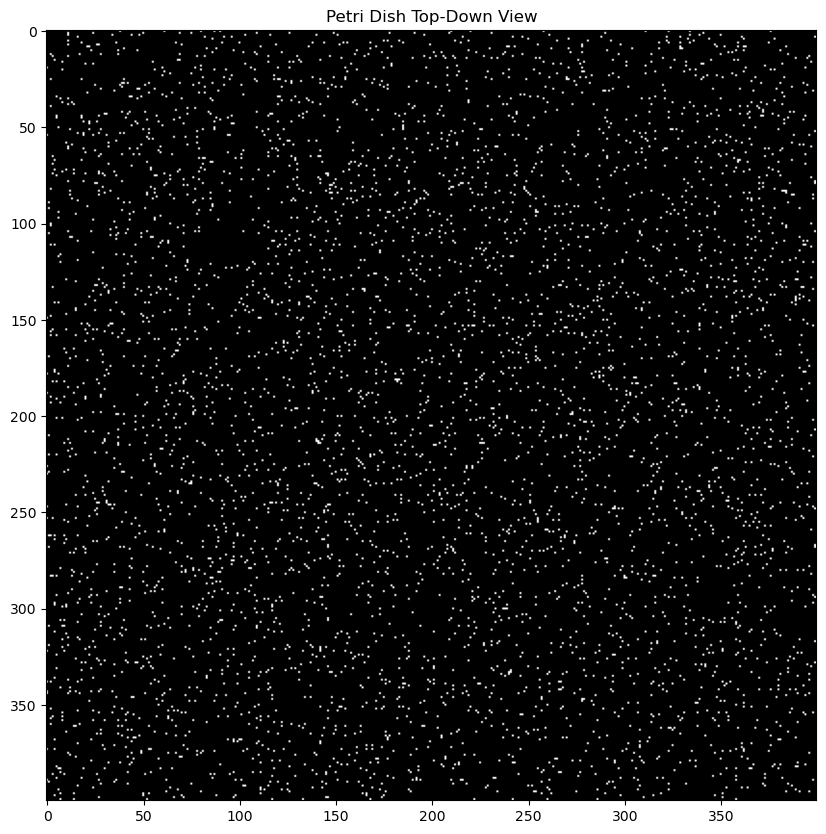

In [5]:
random_rows, random_cols, random_planes = random_universe.shape
random_plane_new = np.zeros((random_rows, random_cols)) #creates a matrix the same size as the xnew matrix to project onto
for i, j, k in np.ndindex(random_universe.shape):
    if random_universe[i,j,k] != 0:
        random_plane_new[i,j] = 1 #projects onto 2d plane from above

plt.figure(figsize = (10,10))
plt.imshow(random_plane_new, cmap = 'gray') #shows the 2d projection
plt.title('Petri Dish Top-Down View')
plt.show()

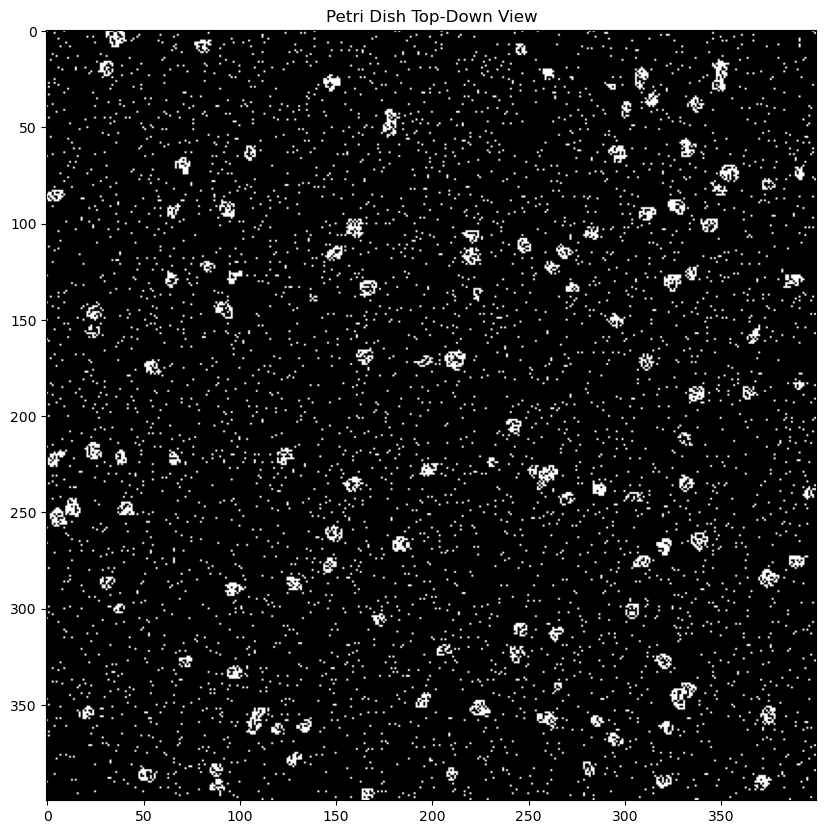

In [17]:
animate_bacteria(random_universe, 5, rules , 'gray')

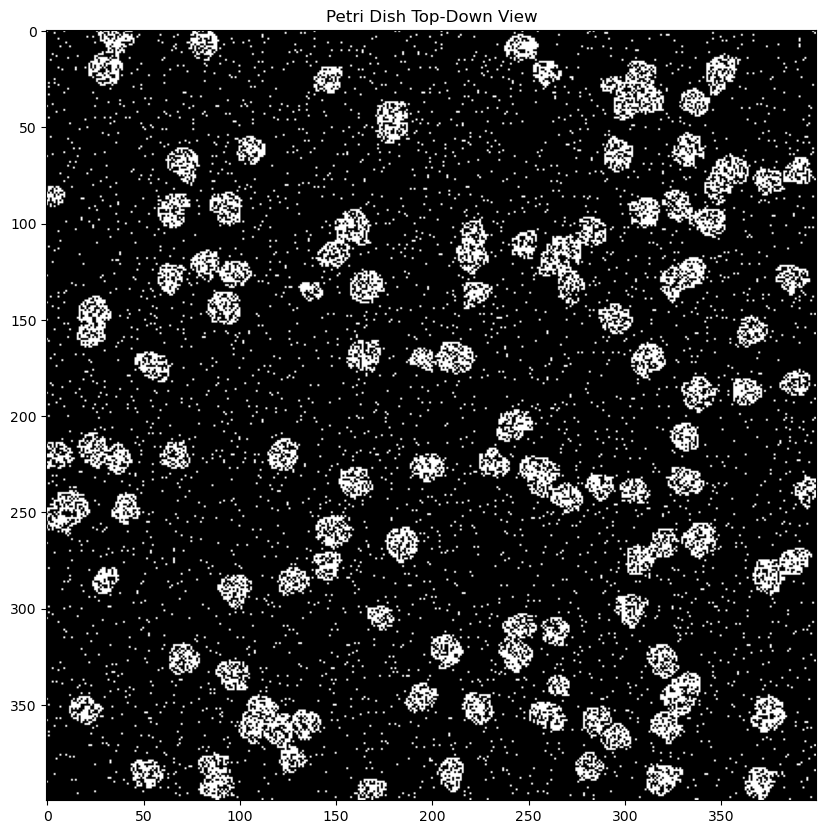

In [18]:
animate_bacteria(random_universe, 10, rules , 'gray')

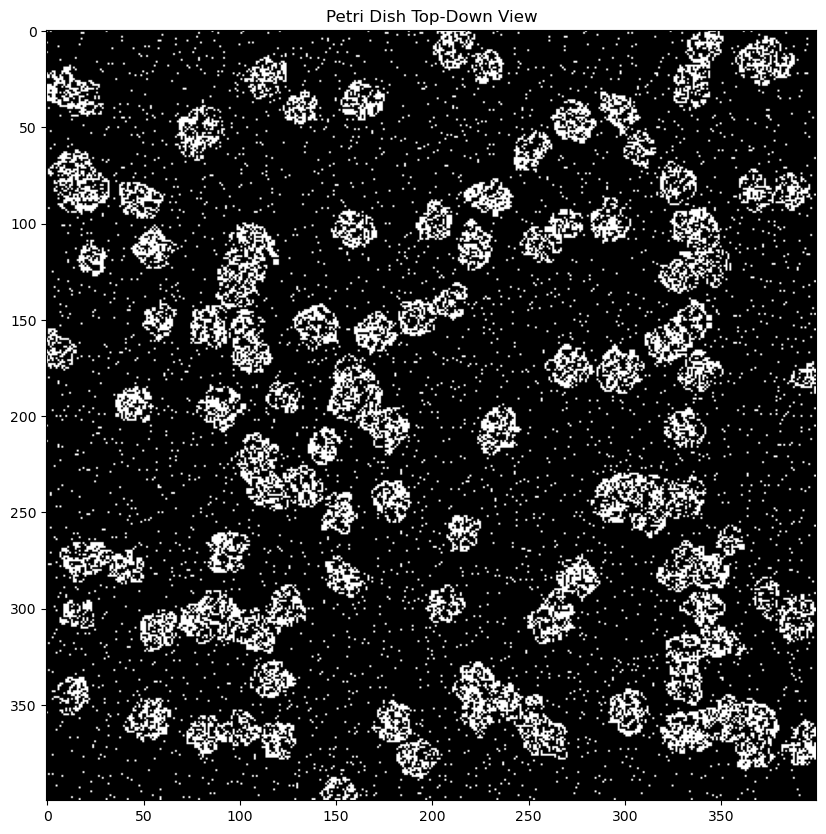

In [11]:
animate_bacteria(random_universe, 15, rules , 'gray')

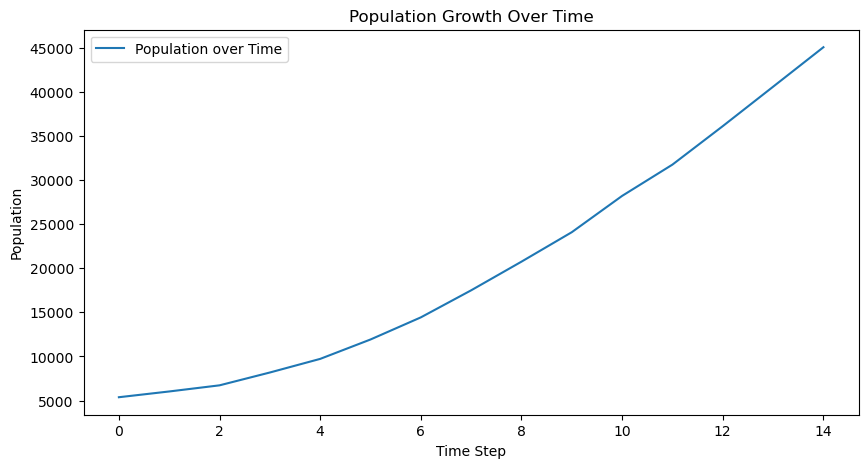

In [22]:
graph(random_universe, 15, rules, 'gray')

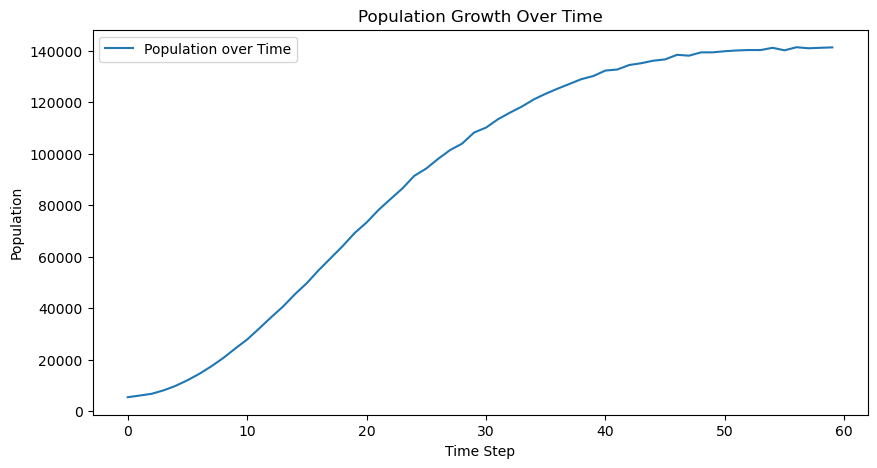

In [23]:
graph(random_universe, 60, rules, 'gray')

In [6]:
#NOW, WE PERFORM THE EXPERIMENT UNDER ANTIBIOTIC CONDITIONS, WHERE X5 = 5 AND X6 = 6


import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import random

#Initial conditions according to the rulesets described in our paper.
X1 = 2
X2 = 2
X3 = 3
X4 = 3
X5 = 5
X6 = 6

def animate_bacteria(universe, n, updateFunc, clrmap):    
    for i in range(n):
        plane, cuboid = updateFunc(universe) #takes the 2D projection and 3d model 

        plt.figure(figsize = (10,10))
        plt.imshow(plane, cmap = clrmap) #shows the 2d projection
        plt.title('Petri Dish Top-Down View')
        plt.show()
        # print(universe)
        universe = cuboid #applies the 3D model to the next generation
        clear_output(wait = True)

def graph(universe, n, updateFunc, clrmap):
    
    population_over_time = [] 
    
    for i in range(n):
        plane, cuboid = updateFunc(universe)
        
        universe = cuboid
        clear_output(wait=True)
        
        # Create variable to determine number of immotile and motile cells within the array
        population_count = np.count_nonzero(cuboid)
        population_over_time.append(population_count)
    
       # Plot figure outside the loop but still within animate_bacteria function to visualize
    plt.figure(figsize=(10, 5))
    plt.plot(population_over_time, label='Population over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('Population Growth Over Time')
    plt.legend()
    plt.show()
    
        
def rules(x):
    rows, cols, planes = x.shape
    xnew = np.zeros(x.shape)
    for i,j, k in np.ndindex(x.shape):
        #sums up all living neighbors of the home cell
        total = 0
        
        
        #Checks the surrounding cells and adds to the total count of live cells surrounding in 3d space, not using wrap around rules to emulate what the paper did
        if j != 0:
            if (x[i, (j-1), k]) > 0:
                total +=1 #left
        if j != cols-1:
            if (x[i, (j+1), k]) > 0:
                total +=1 #right
        if i != 0:
            if (x[(i-1), j, k]) > 0:
                total +=1#up
        if i != rows-1:
            if (x[(i+1), j, k]) > 0:
                total += 1#down
        if (j != 0) & (i != 0):
            if (x[(i-1), (j-1), k]) > 0:
                total +=1 #up and to the left
        if (j!= cols -1) & (i !=0):
            if (x[(i-1), (j+1), k]) > 0:
                total += 1#up and to the right
        if (j!= 0) & (i != rows-1):
            if (x[(i+1), (j-1), k]) > 0:
                total += 1 #down and to the left
        if (j != cols-1) & (i != rows-1):
            if (x[(i+1), (j+1), k]) > 0:
                total += 1#down and to the right
                
        if (k!=planes-1): #lower plane
            if (j != 0):
                if (x[i, (j-1), k+1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k+1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k+1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k+1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k+1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k+1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k+1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k+1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k+1]) > 0:
                total += 1 #direct slot in plane below
            
        if (k!=0): #upper plane
            if (j != 0):
                if (x[i, (j-1), k-1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k-1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k-1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k-1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k-1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k-1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k-1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k-1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k-1]) > 0:
                total += 1 #direct slot in plane above
            
            
#APPLYING THE RULES            
        if x[i,j,k] == 1:
            if total < X1:
                xnew[i,j,k] = 0 #rule i
            if (total == X2) or (total == X3):
                xnew[i,j,k] = 2 #rule ii
            if total > X4:
                xnew[i,j,k] = 0 #rule iii
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 0:
            if (total >= X5) and (total <= X6):
                xnew[i,j,k] = 2 #rule iv - assumes newly divided cells are motile
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 2:
            if total == 26:
                xnew[i,j,k] = 1 #rule vi
            else:
                random_movement = np.zeros(26)
#These if statements check each surrounding cell to see if they are filled, and enters the cell's numerical value (assigned arbitrarily) into a matrix of 26 0s.
                if j != 0:
                    if (x[i, (j-1), k]) == 0:
                        random_movement[0] = 1 
                if j != cols-1:
                    if (x[i, (j+1), k]) == 0:
                        random_movement[1] = 2
                if i != 0:
                    if (x[(i-1), j, k]) == 0:
                        random_movement[2] = 3
                if i != rows-1:
                    if (x[(i+1), j, k]) == 0:
                        random_movement[3] = 4
                if (j != 0) & (i != 0):
                    if (x[(i-1), (j-1), k]) == 0:
                        random_movement[4] = 5
                if (j!= cols -1) & (i !=0):
                    if (x[(i-1), (j+1), k]) == 0:
                        random_movement[5] = 6
                if (j!= 0) & (i != rows-1):
                    if (x[(i+1), (j-1), k]) == 0:
                        random_movement[6] = 7
                if (j != cols-1) & (i != rows-1):
                    if (x[(i+1), (j+1), k]) == 0:
                        random_movement[7] = 8
                
                #lower plane
                if (k!=planes-1):
                    if j != 0:
                        if (x[i, (j-1), k+1]) == 0:
                            random_movement[8] = 9 
                    if j != cols-1:
                        if (x[i, (j+1), k+1]) == 0:
                            random_movement[9] = 10
                    if i != 0:
                        if (x[(i-1), j, k+1]) == 0:
                            random_movement[10] = 11
                    if i != rows-1:
                        if (x[(i+1), j, k+1]) == 0:
                            random_movement[11] = 12
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k+1]) == 0:
                            random_movement[12] = 13
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k+1]) == 0:
                            random_movement[13] = 14
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k+1]) == 0:
                            random_movement[14] = 15
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k+1]) == 0:
                            random_movement[15] = 16
                    if (x[i,j,k+1]) > 0:
                        random_movement[16] = 17
                        
                #upper plane
                if (k!=0):
                    if j != 0:
                        if (x[i, (j-1), k-1]) == 0:
                            random_movement[17] = 18
                    if j != cols-1:
                        if (x[i, (j+1), k-1]) == 0:
                            random_movement[18] = 19
                    if i != 0:
                        if (x[(i-1), j, k-1]) == 0:
                            random_movement[19] = 20
                    if i != rows-1:
                        if (x[(i+1), j, k-1]) == 0:
                            random_movement[20] = 21
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k-1]) == 0:
                            random_movement[21] = 22
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k-1]) == 0:
                            random_movement[22] = 23
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k-1]) == 0:
                            random_movement[23] = 24
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k-1]) == 0:
                            random_movement[24] = 25
                    if (x[i,j,k-1]) > 0:
                        random_movement[25] = 26
                        

#The below segment is responsible for checking which empty space is selected by the random number generator and moving the motile cell to it accordingly. 
                if sum(random_movement) != 0: 
                    filtered_random_movement = [num for num in random_movement if num !=0]
                    rng_temp_var = random.choice(filtered_random_movement)
#same plane
                    if rng_temp_var == 1:
                        xnew[i, (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 2:
                        xnew[i, (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 3:
                        xnew[(i-1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 4:
                        xnew[(i+1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 5:
                        xnew[(i-1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 6:
                        xnew[(i-1), (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 7:
                        xnew[(i+1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 8:
                        xnew[(i+1), (j+1), k] = 2
                        xnew[i,j,k] = 0
#lower plane
                    elif rng_temp_var == 9:
                        xnew[i, (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 10:
                        xnew[i, (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 11:
                        xnew[(i-1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 12:
                        xnew[(i+1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 13:
                        xnew[(i-1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 14:
                        xnew[(i-1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 15:
                        xnew[(i+1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 16:
                        xnew[(i+1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 17:
                        xnew[i,j, k+1] = 2
                        xnew[i,j,k] = 0
#upper plane
                    elif rng_temp_var == 18:
                        xnew[i, (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 19:
                        xnew[i, (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 20:
                        xnew[(i-1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 21:
                        xnew[(i+1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 22:
                        xnew[(i-1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 23:
                        xnew[(i-1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 24:
                        xnew[(i+1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 25:
                        xnew[(i+1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 26:
                        xnew[i,j,k-1] = 2
                        xnew[i,j,k] = 0
                else:
                    xnew[i,j,k] = 1
            
    rows, cols, planes = xnew.shape
    plane_new = np.zeros((rows, cols)) #creates a matrix the same size as the xnew matrix to project onto
    for i, j, k in np.ndindex(xnew.shape):
        if xnew[i,j,k] != 0:
            plane_new[i,j] = 1 #projects onto 2d plane from above
    return plane_new, xnew

num_indices_to_change = 5000
random_universe = np.zeros((400,400,4))
for i in range(num_indices_to_change):
    Ax, Ay, Az = random_universe.shape
    a = np.random.randint(Ax)
    b = np.random.randint(Ay)
    c = np.random.randint(Az)
    random_universe[a,b,c]=1


#How to run the code: change X1-X6 above as needed to model the rules. You can also change the rules under "APPLYING THE RULES', the timesteps under "animate_bacteria" in the above line, and the universe
#size under the initial conditions initialization "random_universe = ..." For one of our sims we changed the way the random universe was initialized so the dimensions of the universe were altered separately
#as is described in the comments in that chunk of code

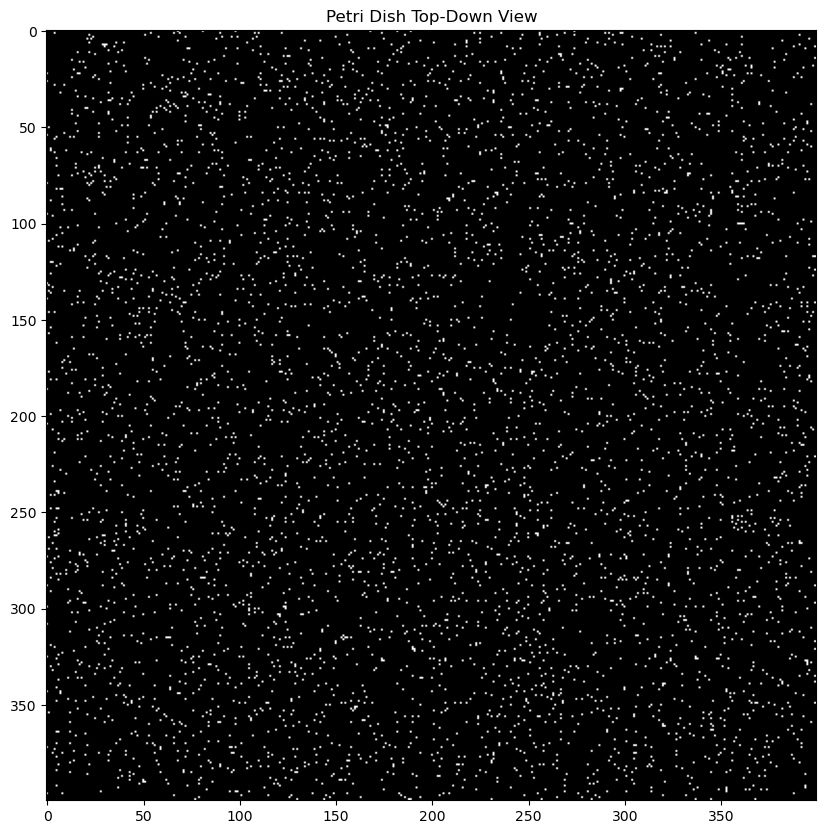

In [7]:
random_rows, random_cols, random_planes = random_universe.shape #Timestep 0
random_plane_new = np.zeros((random_rows, random_cols)) #creates a matrix the same size as the xnew matrix to project onto
for i, j, k in np.ndindex(random_universe.shape):
    if random_universe[i,j,k] != 0:
        random_plane_new[i,j] = 1 #projects onto 2d plane from above

plt.figure(figsize = (10,10))
plt.imshow(random_plane_new, cmap = 'gray') #shows the 2d projection
plt.title('Petri Dish Top-Down View')
plt.show()

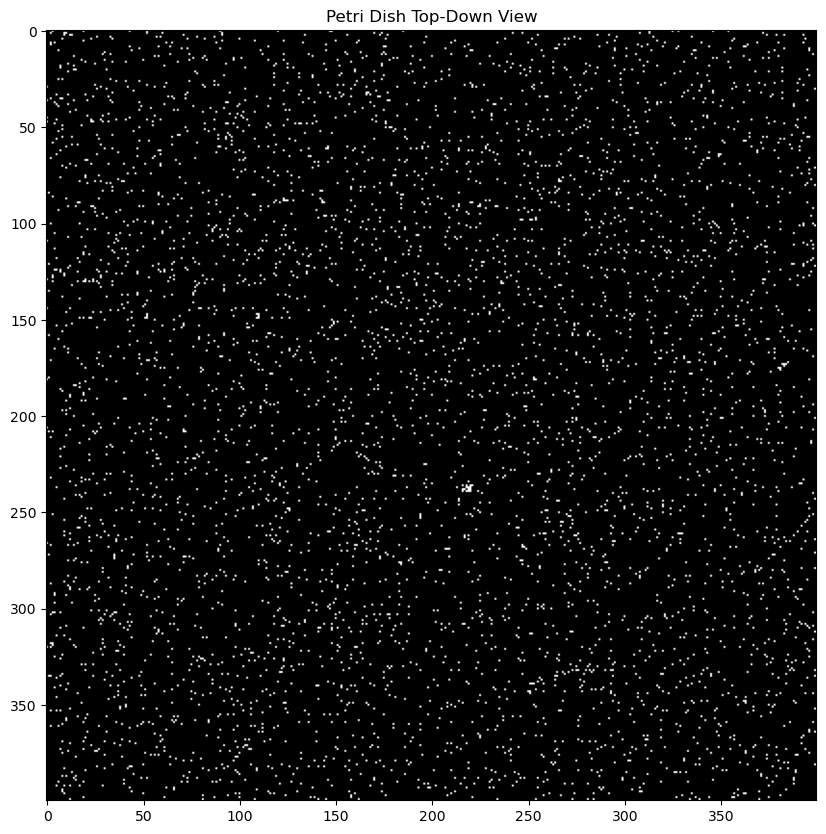

In [6]:
animate_bacteria(random_universe, 5, rules , 'gray')

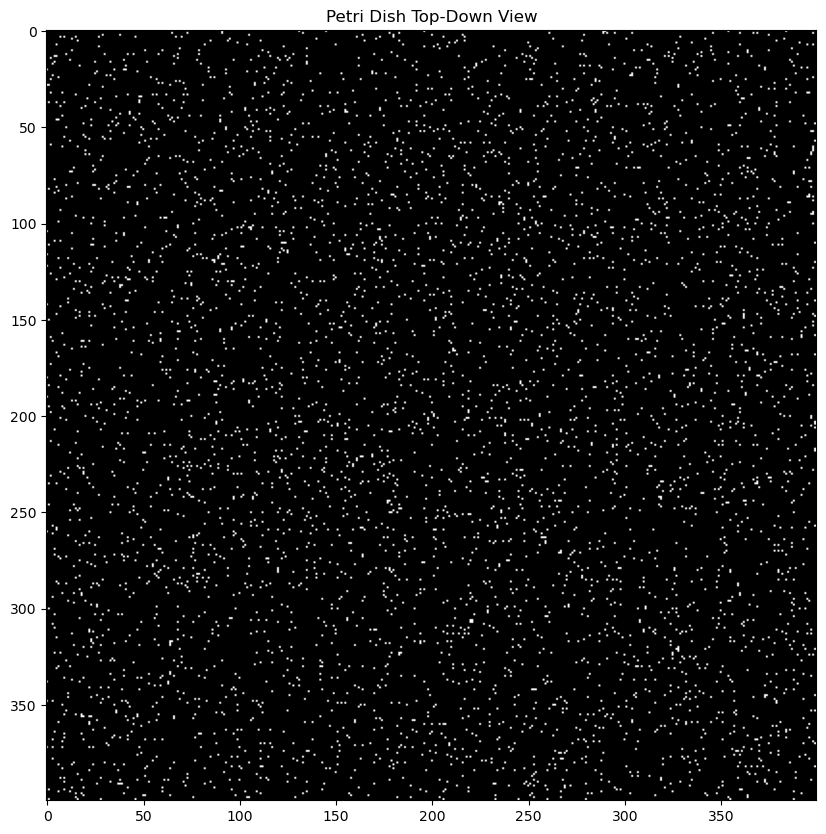

In [26]:
animate_bacteria(random_universe, 10, rules , 'gray')

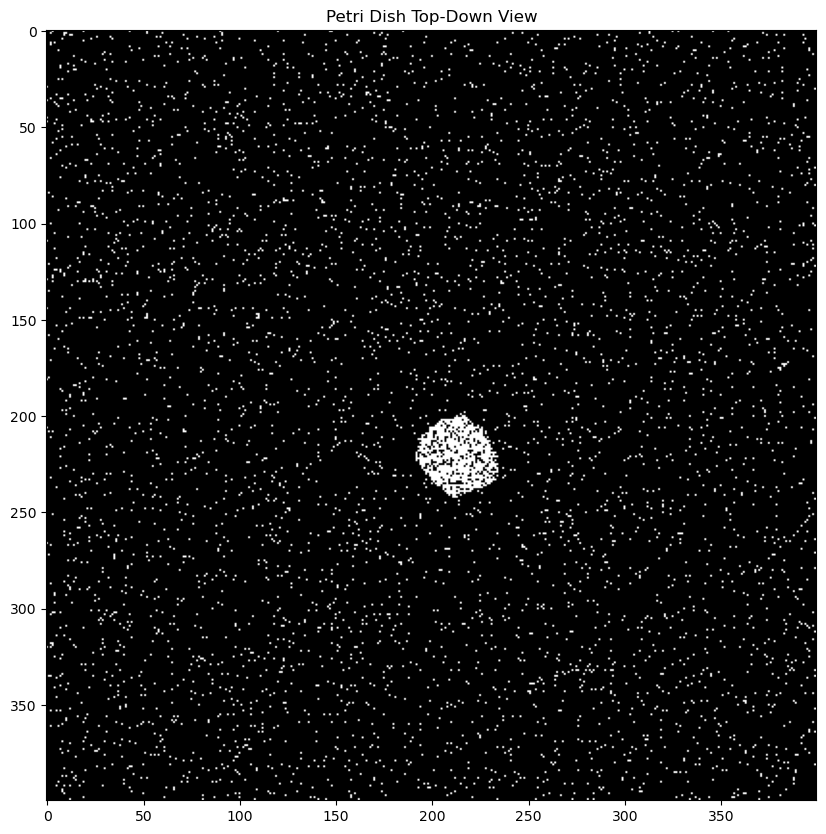

In [8]:
animate_bacteria(random_universe, 60, rules , 'gray')

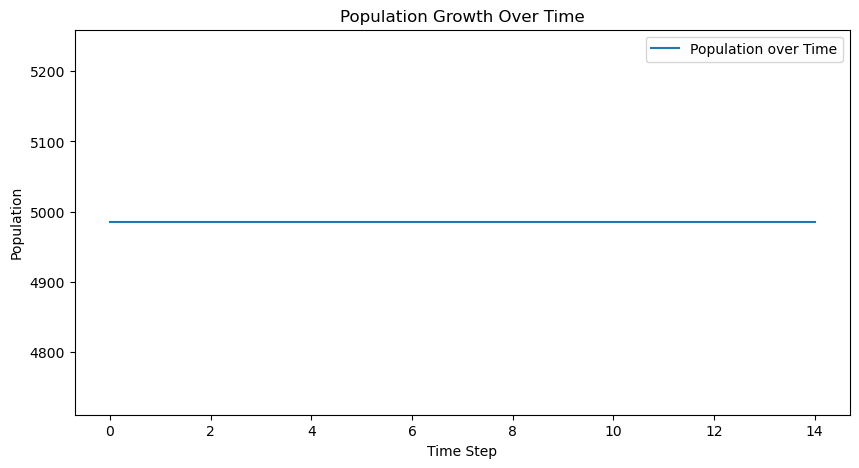

In [28]:
graph(random_universe, 15, rules, 'gray')

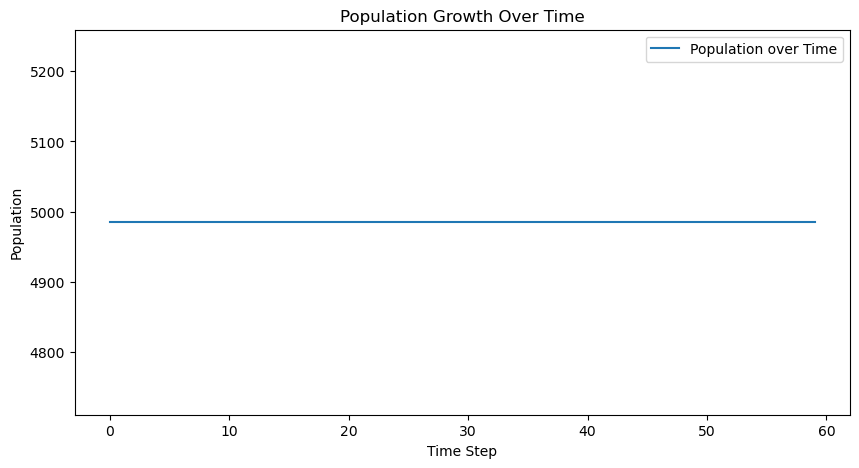

In [29]:
graph(random_universe, 60, rules, 'gray')

In [8]:
#NOW, WE RUN THE SIM WITH THE BACTERIA STARTING IN CLUSTERS OF 8, SIMILAR TO HOW YEAST ASCUS WORK EXCEPT ACCOUNTING FOR THE FACT OUR RULES APPLY IN 3 SPACE... CHANGING RULESET BACK TO NO ANTIBIOTICS
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import random

#Initial conditions according to the rulesets described in our paper.
X1 = 2
X2 = 2
X3 = 3
X4 = 3
X5 = 3
X6 = 3

def animate_bacteria(universe, n, updateFunc, clrmap):    
    for i in range(n):
        plane, cuboid = updateFunc(universe) #takes the 2D projection and 3d model 

        plt.figure(figsize = (10,10))
        plt.imshow(plane, cmap = clrmap) #shows the 2d projection
        plt.title('Petri Dish Top-Down View')
        plt.show()
        # print(universe)
        universe = cuboid #applies the 3D model to the next generation
        clear_output(wait = True)

def graph(universe, n, updateFunc, clrmap):
    
    population_over_time = [] 
    
    for i in range(n):
        plane, cuboid = updateFunc(universe)
        
        universe = cuboid
        clear_output(wait=True)
        
        # Create variable to determine number of immotile and motile cells within the array
        population_count = np.count_nonzero(cuboid)
        population_over_time.append(population_count)
    
       # Plot figure outside the loop but still within animate_bacteria function to visualize
    plt.figure(figsize=(10, 5))
    plt.plot(population_over_time, label='Population over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('Population Growth Over Time')
    plt.legend()
    plt.show()
    
        
def rules(x):
    rows, cols, planes = x.shape
    xnew = np.zeros(x.shape)
    for i,j, k in np.ndindex(x.shape):
        #sums up all living neighbors of the home cell
        total = 0
        
        
        #Checks the surrounding cells and adds to the total count of live cells surrounding in 3d space, not using wrap around rules to emulate what the paper did
        if j != 0:
            if (x[i, (j-1), k]) > 0:
                total +=1 #left
        if j != cols-1:
            if (x[i, (j+1), k]) > 0:
                total +=1 #right
        if i != 0:
            if (x[(i-1), j, k]) > 0:
                total +=1#up
        if i != rows-1:
            if (x[(i+1), j, k]) > 0:
                total += 1#down
        if (j != 0) & (i != 0):
            if (x[(i-1), (j-1), k]) > 0:
                total +=1 #up and to the left
        if (j!= cols -1) & (i !=0):
            if (x[(i-1), (j+1), k]) > 0:
                total += 1#up and to the right
        if (j!= 0) & (i != rows-1):
            if (x[(i+1), (j-1), k]) > 0:
                total += 1 #down and to the left
        if (j != cols-1) & (i != rows-1):
            if (x[(i+1), (j+1), k]) > 0:
                total += 1#down and to the right
                
        if (k!=planes-1): #lower plane
            if (j != 0):
                if (x[i, (j-1), k+1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k+1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k+1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k+1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k+1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k+1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k+1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k+1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k+1]) > 0:
                total += 1 #direct slot in plane below
            
        if (k!=0): #upper plane
            if (j != 0):
                if (x[i, (j-1), k-1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k-1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k-1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k-1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k-1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k-1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k-1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k-1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k-1]) > 0:
                total += 1 #direct slot in plane above
            
            
#APPLYING THE RULES            
        if x[i,j,k] == 1:
            if total < X1:
                xnew[i,j,k] = 0 #rule i
            if (total == X2) or (total == X3):
                xnew[i,j,k] = 2 #rule ii
            if total > X4:
                xnew[i,j,k] = 0 #rule iii
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 0:
            if (total >= X5) and (total <= X6):
                xnew[i,j,k] = 2 #rule iv - assumes newly divided cells are motile
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 2:
            if total == 26:
                xnew[i,j,k] = 1 #rule vi
            else:
                random_movement = np.zeros(26)
#These if statements check each surrounding cell to see if they are filled, and enters the cell's numerical value (assigned arbitrarily) into a matrix of 26 0s.
                if j != 0:
                    if (x[i, (j-1), k]) == 0:
                        random_movement[0] = 1 
                if j != cols-1:
                    if (x[i, (j+1), k]) == 0:
                        random_movement[1] = 2
                if i != 0:
                    if (x[(i-1), j, k]) == 0:
                        random_movement[2] = 3
                if i != rows-1:
                    if (x[(i+1), j, k]) == 0:
                        random_movement[3] = 4
                if (j != 0) & (i != 0):
                    if (x[(i-1), (j-1), k]) == 0:
                        random_movement[4] = 5
                if (j!= cols -1) & (i !=0):
                    if (x[(i-1), (j+1), k]) == 0:
                        random_movement[5] = 6
                if (j!= 0) & (i != rows-1):
                    if (x[(i+1), (j-1), k]) == 0:
                        random_movement[6] = 7
                if (j != cols-1) & (i != rows-1):
                    if (x[(i+1), (j+1), k]) == 0:
                        random_movement[7] = 8
                
                #lower plane
                if (k!=planes-1):
                    if j != 0:
                        if (x[i, (j-1), k+1]) == 0:
                            random_movement[8] = 9 
                    if j != cols-1:
                        if (x[i, (j+1), k+1]) == 0:
                            random_movement[9] = 10
                    if i != 0:
                        if (x[(i-1), j, k+1]) == 0:
                            random_movement[10] = 11
                    if i != rows-1:
                        if (x[(i+1), j, k+1]) == 0:
                            random_movement[11] = 12
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k+1]) == 0:
                            random_movement[12] = 13
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k+1]) == 0:
                            random_movement[13] = 14
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k+1]) == 0:
                            random_movement[14] = 15
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k+1]) == 0:
                            random_movement[15] = 16
                    if (x[i,j,k+1]) > 0:
                        random_movement[16] = 17
                        
                #upper plane
                if (k!=0):
                    if j != 0:
                        if (x[i, (j-1), k-1]) == 0:
                            random_movement[17] = 18
                    if j != cols-1:
                        if (x[i, (j+1), k-1]) == 0:
                            random_movement[18] = 19
                    if i != 0:
                        if (x[(i-1), j, k-1]) == 0:
                            random_movement[19] = 20
                    if i != rows-1:
                        if (x[(i+1), j, k-1]) == 0:
                            random_movement[20] = 21
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k-1]) == 0:
                            random_movement[21] = 22
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k-1]) == 0:
                            random_movement[22] = 23
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k-1]) == 0:
                            random_movement[23] = 24
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k-1]) == 0:
                            random_movement[24] = 25
                    if (x[i,j,k-1]) > 0:
                        random_movement[25] = 26
                        

#The below segment is responsible for checking which empty space is selected by the random number generator and moving the motile cell to it accordingly. 
                if sum(random_movement) != 0: 
                    filtered_random_movement = [num for num in random_movement if num !=0]
                    rng_temp_var = random.choice(filtered_random_movement)
#same plane
                    if rng_temp_var == 1:
                        xnew[i, (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 2:
                        xnew[i, (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 3:
                        xnew[(i-1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 4:
                        xnew[(i+1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 5:
                        xnew[(i-1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 6:
                        xnew[(i-1), (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 7:
                        xnew[(i+1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 8:
                        xnew[(i+1), (j+1), k] = 2
                        xnew[i,j,k] = 0
#lower plane
                    elif rng_temp_var == 9:
                        xnew[i, (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 10:
                        xnew[i, (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 11:
                        xnew[(i-1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 12:
                        xnew[(i+1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 13:
                        xnew[(i-1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 14:
                        xnew[(i-1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 15:
                        xnew[(i+1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 16:
                        xnew[(i+1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 17:
                        xnew[i,j, k+1] = 2
                        xnew[i,j,k] = 0
#upper plane
                    elif rng_temp_var == 18:
                        xnew[i, (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 19:
                        xnew[i, (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 20:
                        xnew[(i-1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 21:
                        xnew[(i+1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 22:
                        xnew[(i-1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 23:
                        xnew[(i-1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 24:
                        xnew[(i+1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 25:
                        xnew[(i+1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 26:
                        xnew[i,j,k-1] = 2
                        xnew[i,j,k] = 0
                else:
                    xnew[i,j,k] = 1
            
    rows, cols, planes = xnew.shape
    plane_new = np.zeros((rows, cols)) #creates a matrix the same size as the xnew matrix to project onto
    for i, j, k in np.ndindex(xnew.shape):
        if xnew[i,j,k] != 0:
            plane_new[i,j] = 1 #projects onto 2d plane from above
    return plane_new, xnew

#How to run the code: change X1-X6 above as needed to model the rules. You can also change the rules under "APPLYING THE RULES', the timesteps under "animate_bacteria" in the above line, and the universe
#size under the initial conditions initialization "random_universe = ..." For one of our sims we changed the way the random universe was initialized so the dimensions of the universe were altered separately
#as is described in the comments in that chunk of code

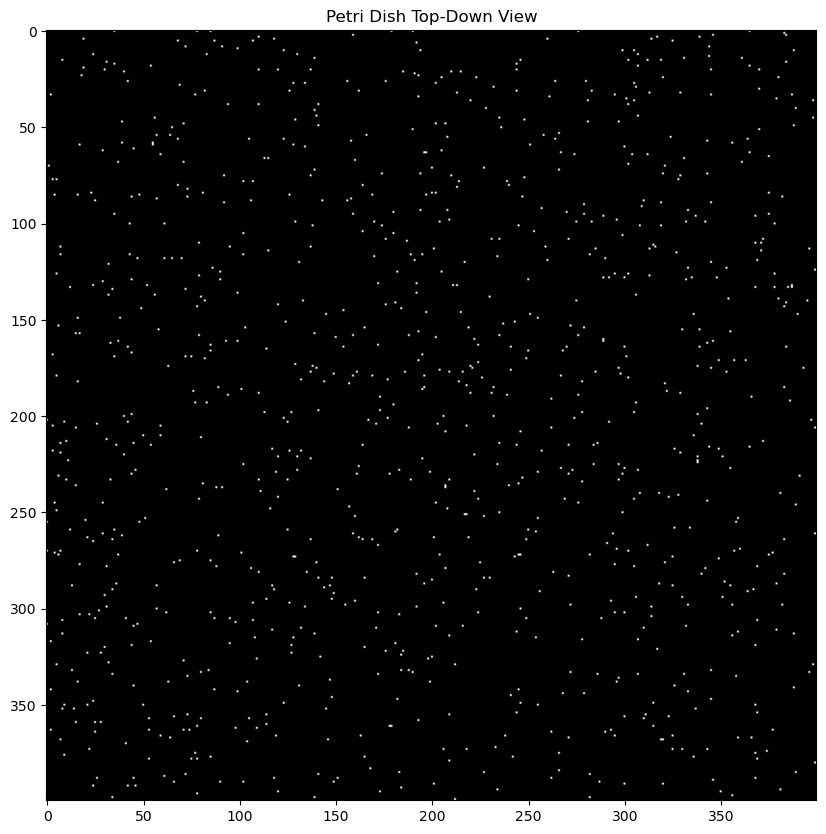

In [69]:
num_indices_to_change = 1000
random_universe = np.zeros((400,400,4))
for i in range(num_indices_to_change):
    Ax, Ay, Az = random_universe.shape
    a = np.random.randint(Ax)
    b = np.random.randint(Ay)
    c = np.random.randint(Az)
    random_universe[a:a+1,b:b+1,c:c+1]=1 #New random universe - less num_indices (1000 instead of 5000) but a total of 8000 points because there are 1000 clusters of 2x2x2
    
random_rows, random_cols, random_planes = random_universe.shape #Timestep 0
random_plane_new = np.zeros((random_rows, random_cols)) #creates a matrix the same size as the xnew matrix to project onto
for i, j, k in np.ndindex(random_universe.shape):
    if random_universe[i,j,k] != 0:
        random_plane_new[i,j] = 1 #projects onto 2d plane from above

plt.figure(figsize = (10,10))
plt.imshow(random_plane_new, cmap = 'gray') #shows the 2d projection
plt.title('Petri Dish Top-Down View')
plt.show()

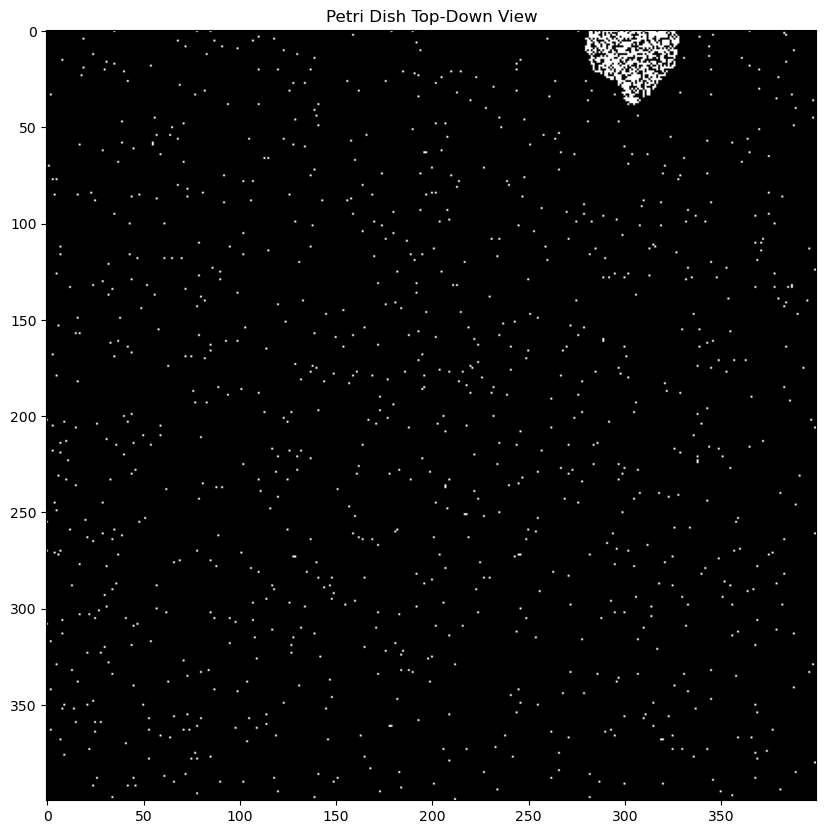

In [70]:
animate_bacteria(random_universe, 30, rules , 'gray')

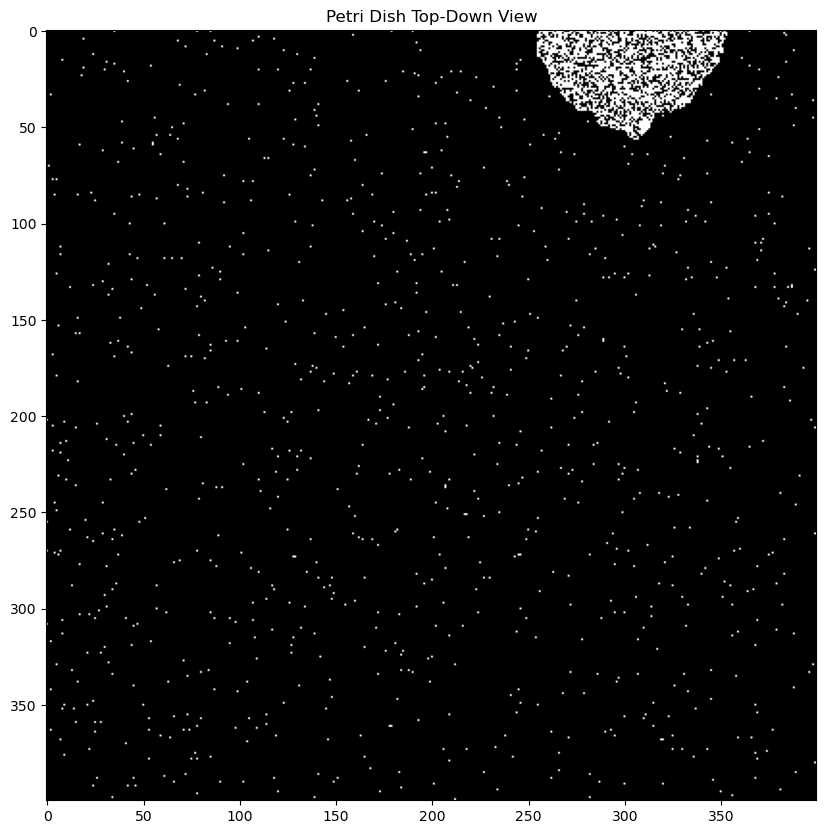

In [71]:
animate_bacteria(random_universe, 60, rules , 'gray')

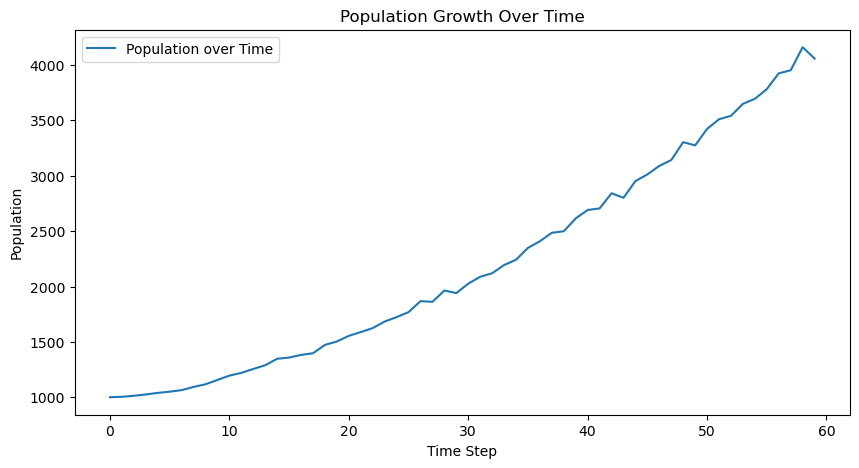

In [72]:
graph(random_universe, 60, rules, 'gray')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline
import random

#Initial conditions according to the rulesets described in our paper.
X1 = 2
X2 = 2
X3 = 3
X4 = 3
X5 = 3
X6 = 3
X7 = 6

def animate_bacteria(universe, n, updateFunc, clrmap):    
    for i in range(n):
        plane, cuboid = updateFunc(universe) #takes the 2D projection and 3d model 

        plt.figure(figsize = (10,10))
        plt.imshow(plane, cmap = clrmap) #shows the 2d projection
        plt.title('Petri Dish Top-Down View')
        plt.show()
        # print(universe)
        universe = cuboid #applies the 3D model to the next generation
        clear_output(wait = True)

def graph(universe, n, updateFunc, clrmap):
    
    population_over_time = [] 
    
    for i in range(n):
        plane, cuboid = updateFunc(universe)
        
        universe = cuboid
        clear_output(wait=True)
        
        # Create variable to determine number of immotile and motile cells within the array
        population_count = np.count_nonzero(cuboid)
        population_over_time.append(population_count)
    
       # Plot figure outside the loop but still within animate_bacteria function to visualize
    plt.figure(figsize=(10, 5))
    plt.plot(population_over_time, label='Population over Time')
    plt.xlabel('Time Step')
    plt.ylabel('Population')
    plt.title('Population Growth Over Time')
    plt.legend()
    plt.show()
    
        
def rules(x):
    rows, cols, planes = x.shape
    xnew = np.zeros(x.shape)
    for i,j, k in np.ndindex(x.shape):
        #sums up all living neighbors of the home cell
        total = 0
        
        
        #Checks the surrounding cells and adds to the total count of live cells surrounding in 3d space, not using wrap around rules to emulate what the paper did
        if j != 0:
            if (x[i, (j-1), k]) > 0:
                total +=1 #left
        if j != cols-1:
            if (x[i, (j+1), k]) > 0:
                total +=1 #right
        if i != 0:
            if (x[(i-1), j, k]) > 0:
                total +=1#up
        if i != rows-1:
            if (x[(i+1), j, k]) > 0:
                total += 1#down
        if (j != 0) & (i != 0):
            if (x[(i-1), (j-1), k]) > 0:
                total +=1 #up and to the left
        if (j!= cols -1) & (i !=0):
            if (x[(i-1), (j+1), k]) > 0:
                total += 1#up and to the right
        if (j!= 0) & (i != rows-1):
            if (x[(i+1), (j-1), k]) > 0:
                total += 1 #down and to the left
        if (j != cols-1) & (i != rows-1):
            if (x[(i+1), (j+1), k]) > 0:
                total += 1#down and to the right
                
        if (k!=planes-1): #lower plane
            if (j != 0):
                if (x[i, (j-1), k+1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k+1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k+1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k+1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k+1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k+1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k+1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k+1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k+1]) > 0:
                total += 1 #direct slot in plane below
            
        if (k!=0): #upper plane
            if (j != 0):
                if (x[i, (j-1), k-1]) > 0:
                    total +=1 #left
            if j != cols-1:
                if (x[i, (j+1), k-1]) > 0:
                    total +=1 #right
            if i != 0:
                if (x[(i-1), j, k-1]) > 0:
                    total +=1#up
            if i != rows-1:
                if (x[(i+1), j, k-1]) > 0:
                    total += 1#down
            if (j != 0) & (i != 0):
                if (x[(i-1), (j-1), k-1]) > 0:
                    total +=1 #up and to the left
            if (j!= cols -1) & (i !=0):
                if (x[(i-1), (j+1), k-1]) > 0:
                    total += 1#up and to the right
            if (j!= 0) & (i != rows-1):
                if (x[(i+1), (j-1), k-1]) > 0:
                    total += 1 #down and to the left
            if (j != cols-1) & (i != rows-1):
                if (x[(i+1), (j+1), k-1]) > 0:
                    total += 1#down and to the right
            if (x[i,j,k-1]) > 0:
                total += 1 #direct slot in plane above
            
            
#APPLYING THE RULES            
        if x[i,j,k] == 1:
            if total < X1:
                xnew[i,j,k] = 0 # rule i
            if (total == X2) or (total == X3):
                xnew[i,j,k] = 2 # rule ii
          
        #NEW RULE 3   
        if x[i,j,k] == 1:
            if total > X4:
                if total >= X7:
                    xnew[i,j,k] = 2  # Becomes motile if at least X7 neighbors
                else:
                    xnew[i,j,k] = 0  # Dies by overcrowding if fewer than X7 neighbors
            else:
                xnew[i,j,k] = 1  # Remains immotile 
          

        elif x[i,j,k] == 0:
            if (total >= X5) and (total <= X6):
                xnew[i,j,k] = 2 #rule iv - assumes newly divided cells are motile
            else:
                xnew[i,j,k] = x[i,j,k]
        elif x[i,j,k] == 2:
            if total == 26:
                xnew[i,j,k] = 1 #rule vi
            else:
                random_movement = np.zeros(26)
#These if statements check each surrounding cell to see if they are filled, and enters the cell's numerical value (assigned arbitrarily) into a matrix of 26 0s.
                if j != 0:
                    if (x[i, (j-1), k]) == 0:
                        random_movement[0] = 1 
                if j != cols-1:
                    if (x[i, (j+1), k]) == 0:
                        random_movement[1] = 2
                if i != 0:
                    if (x[(i-1), j, k]) == 0:
                        random_movement[2] = 3
                if i != rows-1:
                    if (x[(i+1), j, k]) == 0:
                        random_movement[3] = 4
                if (j != 0) & (i != 0):
                    if (x[(i-1), (j-1), k]) == 0:
                        random_movement[4] = 5
                if (j!= cols -1) & (i !=0):
                    if (x[(i-1), (j+1), k]) == 0:
                        random_movement[5] = 6
                if (j!= 0) & (i != rows-1):
                    if (x[(i+1), (j-1), k]) == 0:
                        random_movement[6] = 7
                if (j != cols-1) & (i != rows-1):
                    if (x[(i+1), (j+1), k]) == 0:
                        random_movement[7] = 8
                
                #lower plane
                if (k!=planes-1):
                    if j != 0:
                        if (x[i, (j-1), k+1]) == 0:
                            random_movement[8] = 9 
                    if j != cols-1:
                        if (x[i, (j+1), k+1]) == 0:
                            random_movement[9] = 10
                    if i != 0:
                        if (x[(i-1), j, k+1]) == 0:
                            random_movement[10] = 11
                    if i != rows-1:
                        if (x[(i+1), j, k+1]) == 0:
                            random_movement[11] = 12
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k+1]) == 0:
                            random_movement[12] = 13
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k+1]) == 0:
                            random_movement[13] = 14
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k+1]) == 0:
                            random_movement[14] = 15
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k+1]) == 0:
                            random_movement[15] = 16
                    if (x[i,j,k+1]) > 0:
                        random_movement[16] = 17
                        
                #upper plane
                if (k!=0):
                    if j != 0:
                        if (x[i, (j-1), k-1]) == 0:
                            random_movement[17] = 18
                    if j != cols-1:
                        if (x[i, (j+1), k-1]) == 0:
                            random_movement[18] = 19
                    if i != 0:
                        if (x[(i-1), j, k-1]) == 0:
                            random_movement[19] = 20
                    if i != rows-1:
                        if (x[(i+1), j, k-1]) == 0:
                            random_movement[20] = 21
                    if (j != 0) & (i != 0):
                        if (x[(i-1), (j-1), k-1]) == 0:
                            random_movement[21] = 22
                    if (j!= cols -1) & (i !=0):
                        if (x[(i-1), (j+1), k-1]) == 0:
                            random_movement[22] = 23
                    if (j!= 0) & (i != rows-1):
                        if (x[(i+1), (j-1), k-1]) == 0:
                            random_movement[23] = 24
                    if (j != cols-1) & (i != rows-1):
                        if (x[(i+1), (j+1), k-1]) == 0:
                            random_movement[24] = 25
                    if (x[i,j,k-1]) > 0:
                        random_movement[25] = 26
                        

#The below segment is responsible for checking which empty space is selected by the random number generator and moving the motile cell to it accordingly. 
                if sum(random_movement) != 0: 
                    filtered_random_movement = [num for num in random_movement if num !=0]
                    rng_temp_var = random.choice(filtered_random_movement)
#same plane
                    if rng_temp_var == 1:
                        xnew[i, (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 2:
                        xnew[i, (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 3:
                        xnew[(i-1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 4:
                        xnew[(i+1), j, k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 5:
                        xnew[(i-1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 6:
                        xnew[(i-1), (j+1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 7:
                        xnew[(i+1), (j-1), k] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 8:
                        xnew[(i+1), (j+1), k] = 2
                        xnew[i,j,k] = 0
#lower plane
                    elif rng_temp_var == 9:
                        xnew[i, (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 10:
                        xnew[i, (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 11:
                        xnew[(i-1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 12:
                        xnew[(i+1), j, k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 13:
                        xnew[(i-1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 14:
                        xnew[(i-1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 15:
                        xnew[(i+1), (j-1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 16:
                        xnew[(i+1), (j+1), k+1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 17:
                        xnew[i,j, k+1] = 2
                        xnew[i,j,k] = 0
#upper plane
                    elif rng_temp_var == 18:
                        xnew[i, (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 19:
                        xnew[i, (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 20:
                        xnew[(i-1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 21:
                        xnew[(i+1), j, k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 22:
                        xnew[(i-1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 23:
                        xnew[(i-1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 24:
                        xnew[(i+1), (j-1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 25:
                        xnew[(i+1), (j+1), k-1] = 2
                        xnew[i,j,k] = 0
                    elif rng_temp_var == 26:
                        xnew[i,j,k-1] = 2
                        xnew[i,j,k] = 0
                else:
                    xnew[i,j,k] = 1
            
    rows, cols, planes = xnew.shape
    plane_new = np.zeros((rows, cols)) #creates a matrix the same size as the xnew matrix to project onto
    for i, j, k in np.ndindex(xnew.shape):
        if xnew[i,j,k] != 0:
            plane_new[i,j] = 1 #projects onto 2d plane from above
    return plane_new, xnew

num_indices_to_change = 5000
random_universe = np.zeros((400,400,4))
for i in range(num_indices_to_change):
    Ax, Ay, Az = random_universe.shape
    a = np.random.randint(Ax)
    b = np.random.randint(Ay)
    c = np.random.randint(Az)
    random_universe[a,b,c]=1

#How to run the code: change X1-X6 above as needed to model the rules. You can also change the rules under "APPLYING THE RULES', the timesteps under "animate_bacteria" in the above line, and the universe
#size under the initial conditions initialization "random_universe = ..." For one of our sims we changed the way the random universe was initialized so the dimensions of the universe were altered separately
#as is described in the comments in that chunk of code

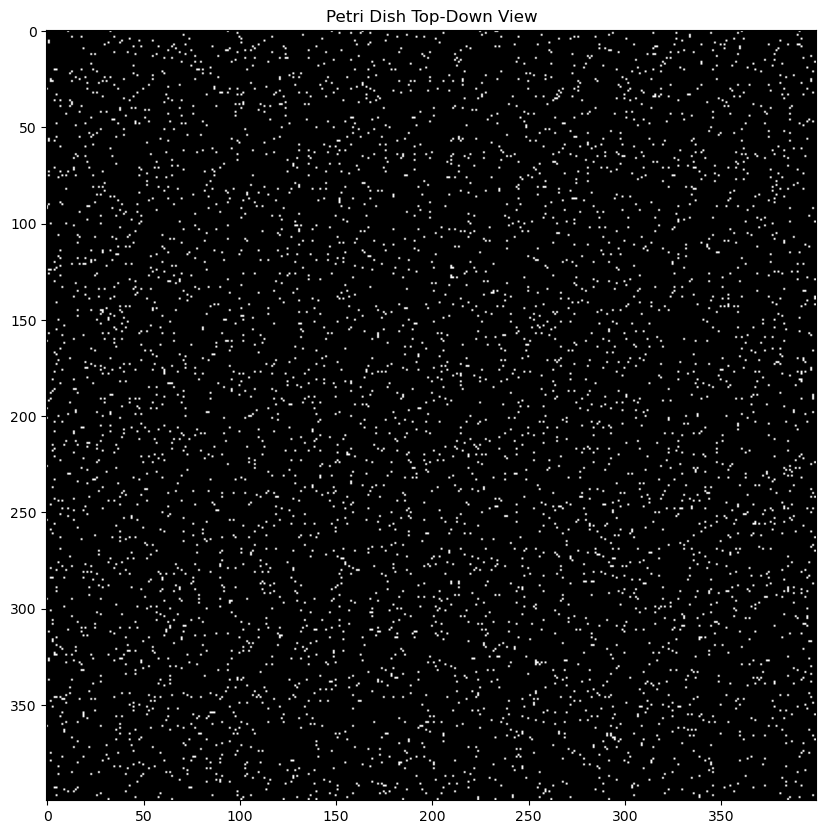

In [69]:
random_rows, random_cols, random_planes = random_universe.shape
random_plane_new = np.zeros((random_rows, random_cols)) #creates a matrix the same size as the xnew matrix to project onto
for i, j, k in np.ndindex(random_universe.shape):
    if random_universe[i,j,k] != 0:
        random_plane_new[i,j] = 1 #projects onto 2d plane from above

plt.figure(figsize = (10,10))
plt.imshow(random_plane_new, cmap = 'gray') #shows the 2d projection
plt.title('Petri Dish Top-Down View')
plt.show()

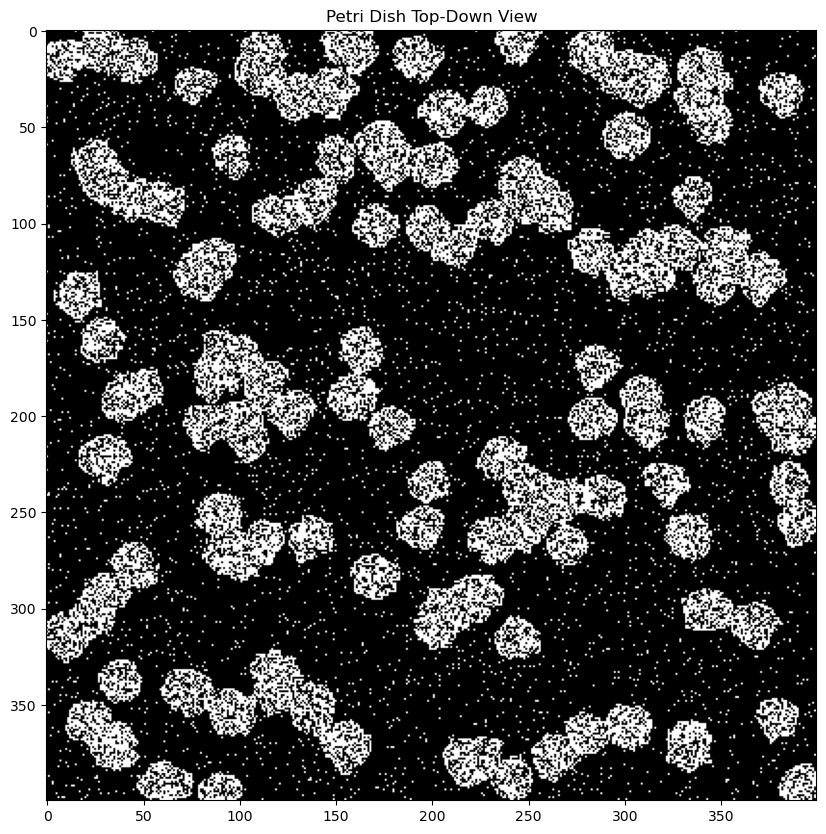

In [6]:
animate_bacteria(random_universe, 15, rules , 'gray')

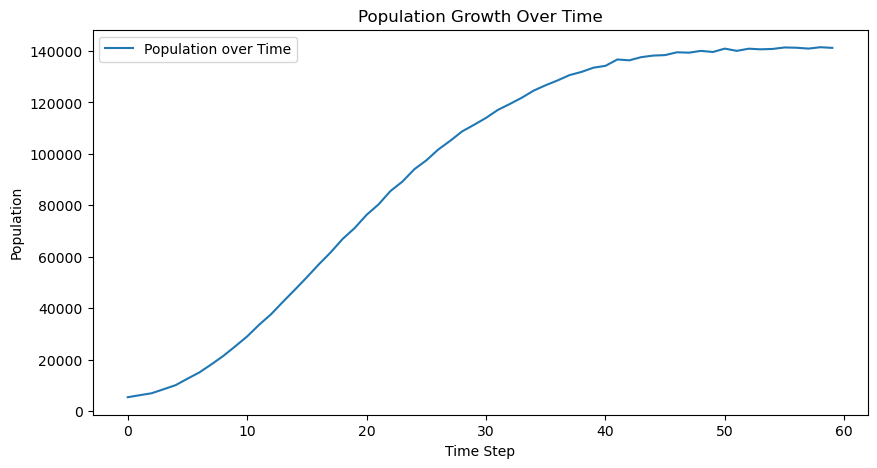

In [8]:
graph(random_universe, 60, rules, 'gray')